### PIBIC - AVALIAÇÕES DAS PROPRIEDADES FÍSICAS DA MASSA E DE PÃES ELABORADOS COM ADIÇÃO DE FARINHAS DE BIOMASSA DE BANANA E DE SOJA

#### O código abaixo trata-se do codigo realizado na linguagem de programação python para realização da analise de clusters da imagem das fatias dos pães elaborados

#### Desenvolvido pelo bolsista de PIBIC Vitor Kauã Oliveira de Souza, do segundo ano de Ciência da Computação da Universidade Estadual do Norte do Paraná, orientado pelo professor Doutor Luís Guilherme Sachs.

---

#### Inclusão das bibliotecas necessárias

##### OBS: O CAMINHO PATH E A VARIAVEL PATH_TO_MODULE ESTÁ EXCLUSIVAMENTE NA MINHA MÁQUINA. NA SUA, VOCE DEVERÁ TER SEU AMBIENTE VIRTUAL PYTHON CONFIGURADO E COM AS BIBLIOTECAS INSTALADAS E NA VARIAVEL, PASSAR O CAMINHO QUE ESTÁ NA SUA MÁQUINA

In [1]:
import os
os.sys.path
import sys
path_to_module = "../venv/lib/python3.11/site-packages/"
sys.path.append(path_to_module)

#### Incluindo as bibliotecas baixadas no ambiente virtual

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#### Código principal

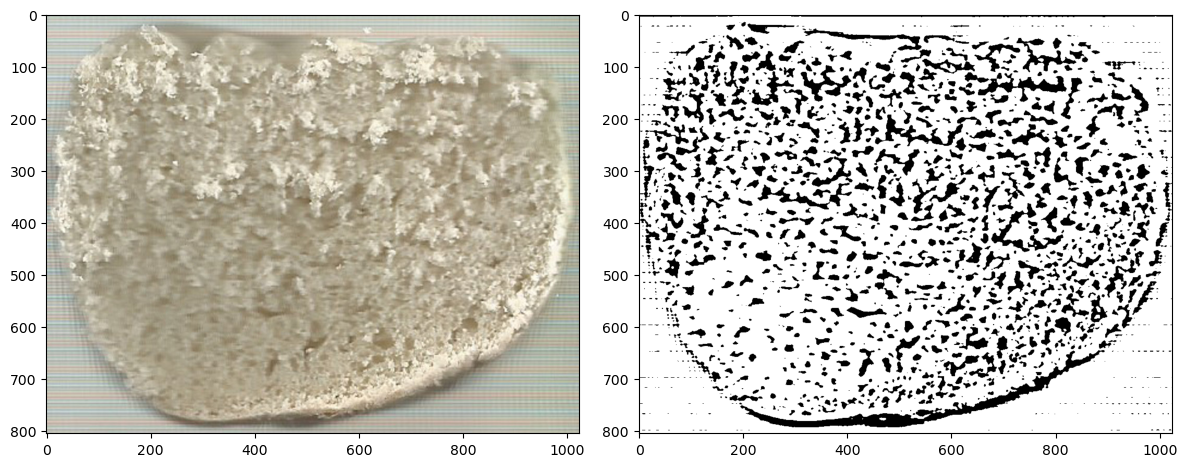

In [3]:
# Read and prepare image
img = cv2.imread('./../models/aline_models/exp1/1_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply adaptive thresholding
mask = cv2.adaptiveThreshold(blurred,
                              255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY,
                              31,
                              10)

# Plot results

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

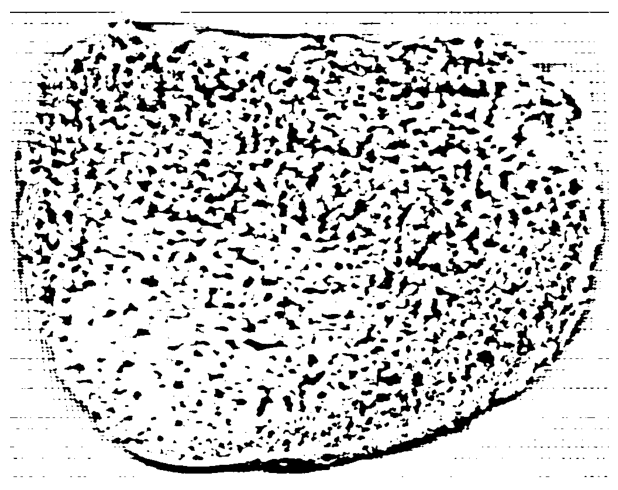

In [5]:
ax = plt.subplots(1, figsize=(12,5))
ax[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
ax[1].axis('off')
plt.tight_layout()

# Save the plotted image
plt.savefig('./../models/aline_models/exp1/1_1_bin.jpg', bbox_inches='tight', pad_inches=0)

##### Counting black and white pixels

In [4]:
# reading the image data from desired directory 
img = cv2.imread("./../models/aline_models/exp1/1_1_bin.jpg") 
  
# counting the number of pixels 
number_of_white_pix = np.sum(img == 255) 
number_of_black_pix = np.sum(img == 0) 
  
print('Number of white pixels:', number_of_white_pix) 
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 388242
Number of black pixels: 57624


#### Contando numero de clusters

In [8]:
img = cv2.imread('./../models/aline_models/exp1/1_1_bin.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)
contours,h = cv2.findContours(thresh,1,2)
for cnt in contours:
    cv2.drawContours(img,[cnt],0,(0,0,255),1)

In [5]:
# Read the thresholded image
img = cv2.imread('./../models/aline_models/exp1/1_1_bin.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold
ret, thresh = cv2.threshold(gray, 127, 255, 0)

# Find contours with hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of interior holes
num_interior_holes = 0
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        num_interior_holes += 1

print(f"Number of interior holes: {num_interior_holes}")

# Draw contours on the original image (optional)
cv2.drawContours(img, contours, -1, (0, 0, 255), 1)

# Display or save the modified image
cv2.imshow('Modified Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of interior holes: 18
